In [1]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test ,y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [4]:
print(x_train.shape, x_test.shape)

(8982,) (2246,)


In [5]:
print(y_train.shape, y_test.shape)

(8982,) (2246,)


In [6]:
x_train[:3]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [7]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

In [8]:
np.max(y_train) + 1     # 총 46개의 뉴스 카테고리

46

In [9]:
lengths = [len(line) for line in x_train]    # 기사의 단어길이
lengths

[87,
 56,
 139,
 224,
 101,
 116,
 100,
 100,
 82,
 106,
 31,
 59,
 65,
 316,
 527,
 76,
 114,
 17,
 91,
 77,
 231,
 108,
 83,
 29,
 95,
 110,
 23,
 373,
 114,
 354,
 133,
 222,
 571,
 155,
 83,
 208,
 170,
 269,
 74,
 19,
 23,
 78,
 21,
 377,
 104,
 299,
 89,
 56,
 94,
 139,
 118,
 36,
 137,
 107,
 83,
 66,
 70,
 112,
 88,
 51,
 83,
 123,
 17,
 185,
 84,
 52,
 102,
 73,
 106,
 486,
 107,
 82,
 263,
 172,
 491,
 190,
 143,
 62,
 26,
 88,
 114,
 38,
 85,
 112,
 793,
 104,
 25,
 21,
 101,
 28,
 25,
 81,
 135,
 73,
 62,
 18,
 90,
 266,
 91,
 64,
 409,
 92,
 319,
 166,
 85,
 200,
 152,
 474,
 60,
 58,
 584,
 71,
 273,
 51,
 255,
 28,
 171,
 143,
 91,
 46,
 110,
 77,
 162,
 24,
 52,
 175,
 61,
 95,
 97,
 259,
 112,
 73,
 94,
 17,
 650,
 23,
 88,
 309,
 105,
 89,
 41,
 314,
 54,
 374,
 67,
 160,
 75,
 207,
 373,
 84,
 87,
 74,
 98,
 136,
 256,
 95,
 50,
 108,
 52,
 100,
 233,
 86,
 68,
 47,
 73,
 158,
 113,
 23,
 100,
 80,
 202,
 104,
 122,
 101,
 95,
 118,
 253,
 192,
 80,
 183,
 29,
 604,


(array([9.680e+02, 1.324e+03, 1.435e+03, 1.482e+03, 7.290e+02, 3.690e+02,
        4.230e+02, 4.010e+02, 2.960e+02, 1.920e+02, 1.730e+02, 1.680e+02,
        1.660e+02, 8.200e+01, 8.800e+01, 7.600e+01, 6.300e+01, 5.300e+01,
        5.300e+01, 6.500e+01, 3.700e+01, 3.900e+01, 3.300e+01, 2.600e+01,
        3.500e+01, 2.900e+01, 3.000e+01, 1.300e+01, 2.300e+01, 2.400e+01,
        1.400e+01, 1.400e+01, 1.200e+01, 1.300e+01, 7.000e+00, 8.000e+00,
        5.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

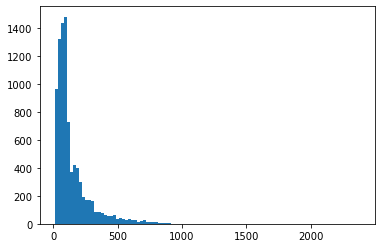

In [10]:
plt.hist(lengths, bins = 100)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(x_train, maxlen = 200)
x_test_seq = pad_sequences(x_test, maxlen = 200)

In [12]:
print(x_train_seq.shape, x_test_seq.shape)

(8982, 200) (2246, 200)


In [13]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [14]:
y_train_oh.shape

(8982, 46)

In [18]:
model = Sequential()
model.add(Embedding(1000, 30))
model.add(LSTM(100))
model.add(Dense(46, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 30)          30000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               52400     
                                                                 
 dense_1 (Dense)             (None, 46)                4646      
                                                                 
Total params: 87,046
Trainable params: 87,046
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [20]:
model.fit(x_train_seq, y_train_oh, epochs = 20, batch_size = 20, validation_data=(x_test_seq, y_test_oh))

Epoch 1/20
450/450 [==============================] - 7s 13ms/step - loss: 2.2891 - accuracy: 0.4183 - val_loss: 2.0121 - val_accuracy: 0.4960
Epoch 2/20
450/450 [==============================] - 6s 12ms/step - loss: 1.9271 - accuracy: 0.4942 - val_loss: 2.0599 - val_accuracy: 0.5000
Epoch 3/20
450/450 [==============================] - 6s 12ms/step - loss: 1.8061 - accuracy: 0.5285 - val_loss: 1.8073 - val_accuracy: 0.5436
Epoch 4/20
450/450 [==============================] - 6s 12ms/step - loss: 1.6894 - accuracy: 0.5612 - val_loss: 1.6867 - val_accuracy: 0.5735
Epoch 5/20
450/450 [==============================] - 5s 12ms/step - loss: 1.6134 - accuracy: 0.5842 - val_loss: 1.6535 - val_accuracy: 0.5779
Epoch 6/20
450/450 [==============================] - 6s 12ms/step - loss: 1.5739 - accuracy: 0.5910 - val_loss: 1.5610 - val_accuracy: 0.6006
Epoch 7/20
450/450 [==============================] - 5s 12ms/step - loss: 1.4879 - accuracy: 0.6142 - val_loss: 1.4841 - val_accuracy: 0.6291